In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read csv files:
result1 = pd.read_csv("results.csv")
result2 = pd.read_csv("shootouts.csv")

In [4]:
# View dataframes:
result1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
result2.head()

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-17,Thailand,South Korea,South Korea
3,1972-05-19,Thailand,Cambodia,Thailand
4,1973-07-26,Malaysia,Kuwait,Malaysia


In [6]:
# See if there's any overlapping part:
print(np.dtype(result1.date))
print(np.dtype(result2.date))

object
object


In [7]:
when1967 = result1.loc[result1.date.str[:4]=='1967']
when1967

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
6434,1967-01-04,Gabon,DR Congo,1,0,Friendly,Libreville,Gabon,False
6435,1967-01-04,Uruguay,Romania,1,1,Friendly,Montevideo,Uruguay,False
6436,1967-01-05,Mexico,Switzerland,3,0,Friendly,Mexico City,Mexico,False
6437,1967-01-08,Mexico,Switzerland,0,2,Friendly,Guadalajara,Mexico,False
6438,1967-01-11,Jamaica,Curaçao,1,1,CONCACAF Championship qualification,Kingston,Jamaica,False
...,...,...,...,...,...,...,...,...,...
6773,1967-12-23,France,Luxembourg,3,1,UEFA Euro qualification,Paris,France,False
6774,1967-12-23,Italy,Switzerland,4,0,UEFA Euro qualification,Cagliari,Italy,False
6775,1967-12-23,Nigeria,Ghana,2,2,Friendly,Lagos,Nigeria,False
6776,1967-12-24,DR Congo,Romania,1,1,Friendly,Kinshasa,DR Congo,False


In [8]:
a = np.array([[]])
len1 = result1.shape[0]
len2 = result2.shape[0]
for i in range(6434, 10000):
    for j in range(0, len2):
        if ((result1['date'][i]==result2['date'][j])&(result1['home_team'][i]==result2['home_team'][j])&(result1['away_team'][i]==result2['away_team'][j])):
            a = np.append(a, [[i,j]])
a=a.astype('int')
print(a)

[6638    0 8082    1 8271    2 8274    3 8782    5 8783    4 8785    6
 8787    7 8820    8 8858    9 8861   10 9079   11 9197   12 9204   13
 9261   14 9308   15 9337   16 9669   17 9701   18 9896   19]


In [9]:
print(result1.iloc[6638])
print(result2.iloc[0])
print('**************************************************')
print(result1.iloc[8082])
print(result2.iloc[1])

date                  1967-08-22
home_team                  India
away_team                 Taiwan
home_score                     1
away_score                     1
tournament    Merdeka Tournament
city                Kuala Lumpur
country                 Malaysia
neutral                     True
Name: 6638, dtype: object
date         1967-08-22
home_team         India
away_team        Taiwan
winner           Taiwan
Name: 0, dtype: object
**************************************************
date                1971-11-14
home_team          South Korea
away_team     Vietnam Republic
home_score                   1
away_score                   1
tournament          King's Cup
city                   Bangkok
country               Thailand
neutral                   True
Name: 8082, dtype: object
date               1971-11-14
home_team         South Korea
away_team    Vietnam Republic
winner            South Korea
Name: 1, dtype: object


In [10]:
# It seems that the second CSV ("shootouts.csv") is entirely included in the first csv ("results.csv")!
# So, we'll only use the first csv ("results.csv")!
# For simplicity, We'll only use the games after 1980
when1980 = result1.loc[result1.date.str[:4]=='1980']
when1980

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
11272,1980-01-06,Sierra Leone,Ghana,2,4,Friendly,Freetown,Sierra Leone,False
11273,1980-01-16,Cyprus,Greece,1,1,Friendly,Nicosia,Cyprus,False
11274,1980-01-19,Congo,Ivory Coast,2,0,Friendly,Brazzaville,Congo,False
11275,1980-01-20,Congo,Ivory Coast,0,2,Friendly,Brazzaville,Congo,False
11276,1980-01-23,Spain,Netherlands,1,0,Friendly,Vigo,Spain,False
...,...,...,...,...,...,...,...,...,...
11773,1980-12-28,Sudan,Algeria,1,1,FIFA World Cup qualification,Khartoum,Sudan,False
11774,1980-12-28,Togo,Niger,1,2,FIFA World Cup qualification,Lomé,Togo,False
11775,1980-12-30,North Korea,Japan,1,0,FIFA World Cup qualification,So Kon Po,Hong Kong,True
11776,1980-12-30,Uruguay,Netherlands,2,0,Mundialito,Montevideo,Uruguay,False


In [11]:
result11 = result1[11272:]
result11.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
11272,1980-01-06,Sierra Leone,Ghana,2,4,Friendly,Freetown,Sierra Leone,False
11273,1980-01-16,Cyprus,Greece,1,1,Friendly,Nicosia,Cyprus,False
11274,1980-01-19,Congo,Ivory Coast,2,0,Friendly,Brazzaville,Congo,False
11275,1980-01-20,Congo,Ivory Coast,0,2,Friendly,Brazzaville,Congo,False
11276,1980-01-23,Spain,Netherlands,1,0,Friendly,Vigo,Spain,False


In [12]:
# Do some data cleaning:
ht_unique = result11['home_team'].unique()
ht_unique.sort()
print(ht_unique)

['Abkhazia' 'Afghanistan' 'Albania' 'Alderney' 'Algeria' 'American Samoa'
 'Andalusia' 'Andorra' 'Angola' 'Anguilla' 'Antigua and Barbuda'
 'Arameans Suryoye' 'Argentina' 'Armenia' 'Artsakh' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barawa'
 'Barbados' 'Basque Country' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bolivia' 'Bonaire' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brittany' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Canary Islands' 'Cape Verde' 'Cascadia' 'Catalonia' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chagos Islands' 'Chameria' 'Chile'
 'China PR' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Corsica'
 'Costa Rica' 'County of Nice' 'Croatia' 'Cuba' 'Curaçao' 'Cyprus'
 'Czech Republic' 'Czechoslovakia' 'DR Congo' 'Darfur' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Ellan Vannin' 'England' 'Equatorial Guin

In [13]:
# It seems that there's no redundant data!

# 1. Which team won the most games since 1980?
result11['winner']=' '
def which_won(row):
    if (row.home_score>row.away_score):
        row.winner=row.home_team
    elif (row.home_score<row.away_score):
        row.winner=row.away_team
    else:
        row.winner='Tie'
    return row
result11=result11.apply(which_won, axis='columns')
result11.head()

C:\Users\Lorry\AppData\Local\Temp/ipykernel_9924/310770194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result11['winner']=' '


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
11272,1980-01-06,Sierra Leone,Ghana,2,4,Friendly,Freetown,Sierra Leone,False,Ghana
11273,1980-01-16,Cyprus,Greece,1,1,Friendly,Nicosia,Cyprus,False,Tie
11274,1980-01-19,Congo,Ivory Coast,2,0,Friendly,Brazzaville,Congo,False,Congo
11275,1980-01-20,Congo,Ivory Coast,0,2,Friendly,Brazzaville,Congo,False,Ivory Coast
11276,1980-01-23,Spain,Netherlands,1,0,Friendly,Vigo,Spain,False,Spain


In [14]:
most_wins = result11.winner.value_counts()
most_wins.head(11)

Tie              7787
Brazil            388
Mexico            343
Germany           326
South Korea       308
Spain             305
Saudi Arabia      296
France            290
United States     289
England           275
Egypt             271
Name: winner, dtype: int64

<PandasArray>
[       'Brazil',        'Mexico',       'Germany',   'South Korea',
         'Spain',  'Saudi Arabia',        'France', 'United States',
       'England',         'Egypt']
Length: 10, dtype: object
<PandasArray>
[388, 343, 326, 308, 305, 296, 290, 289, 275, 271]
Length: 10, dtype: int64


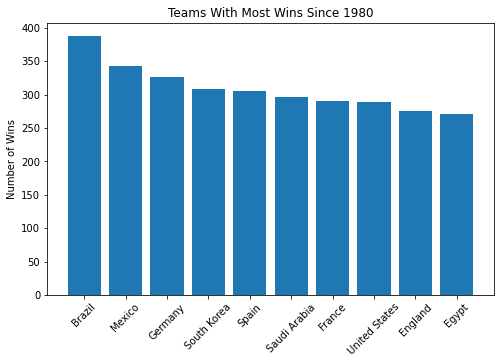

In [15]:
win_labels = most_wins[1:11].index.array
print(win_labels)
win_times = most_wins[1:11].array
print(win_times)

# Plot bar-charts：
plt.figure(figsize=(8,5))
plt.title('Teams With Most Wins Since 1980')
win_bars = plt.bar(win_labels, win_times)
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()

In [16]:
# 2. Which team has the highest winning rate?
# Calculate the winning rate of each team. Only teams with more than 40 games will be considered.
result11=result11.reset_index(drop=True)
winpct = {}
ht_len = ht_unique.size
len = result11.shape[0]
for j in range(0, ht_len):
    team=ht_unique[j]
    tol=0
    win=0
    for i in range(0, len):
        if ((result11['home_team'][i]==team) | (result11['away_team'][i]==team)):
            tol=tol+1
        if (result11['winner'][i]==team):
            win=win+1
    if (tol>=40):
        winpct[team]=round(win/tol, 3)
print(winpct)


{'Afghanistan': 0.298, 'Albania': 0.273, 'Algeria': 0.44, 'American Samoa': 0.104, 'Andorra': 0.054, 'Angola': 0.347, 'Anguilla': 0.046, 'Antigua and Barbuda': 0.335, 'Argentina': 0.53, 'Armenia': 0.253, 'Aruba': 0.164, 'Australia': 0.504, 'Austria': 0.391, 'Azerbaijan': 0.184, 'Bahamas': 0.286, 'Bahrain': 0.361, 'Bangladesh': 0.243, 'Barbados': 0.35, 'Belarus': 0.302, 'Belgium': 0.507, 'Belize': 0.224, 'Benin': 0.239, 'Bermuda': 0.393, 'Bhutan': 0.099, 'Bolivia': 0.214, 'Bosnia and Herzegovina': 0.377, 'Botswana': 0.276, 'Brazil': 0.65, 'British Virgin Islands': 0.168, 'Brunei': 0.141, 'Bulgaria': 0.378, 'Burkina Faso': 0.325, 'Burundi': 0.324, 'Cambodia': 0.201, 'Cameroon': 0.443, 'Canada': 0.384, 'Cape Verde': 0.376, 'Cayman Islands': 0.2, 'Central African Republic': 0.191, 'Chad': 0.189, 'Chile': 0.422, 'China PR': 0.444, 'Colombia': 0.43, 'Comoros': 0.194, 'Congo': 0.318, 'Cook Islands': 0.22, 'Costa Rica': 0.389, 'Croatia': 0.526, 'Cuba': 0.365, 'Curaçao': 0.319, 'Cyprus': 0.212,

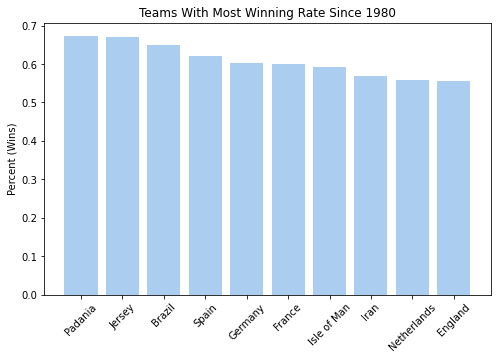

In [17]:
sorted_winpct = sorted(winpct.items(), key=lambda kv: kv[1], reverse=True)
winpct_teams = np.array([])
winpct_values = np.array([])
for i in range(0, 10):
    winpct_teams = np.append(winpct_teams, sorted_winpct[i][0])
    winpct_values = np.append(winpct_values, sorted_winpct[i][1])

# Plot bar-charts：
plt.figure(figsize=(8,5))
plt.title('Teams With Most Winning Rate Since 1980')
win_bars = plt.bar(winpct_teams, winpct_values, color='#abcdef')
plt.ylabel('Percent (Wins)')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Brazil is absolutely the best national team since 1980! That's why it won World Cup for 5 times!

# 3. Do home teams really have larger chances to win than away teams? Is there really a "home-effect"?
result11['home/away']=''
def homeOrAway(row):
    if ((row.home_score>row.away_score) & (row.neutral==False)):
        row['home/away']='Home'
    elif ((row.home_score<row.away_score) & (row.neutral==False)):
        row['home/away']='Away'
    elif ((row.home_score==row.away_score) & (row.neutral==False)):
        row['home/away']='Tie'
    else:
        row['home/away']='N/A'
    return row
result11=result11.apply(homeOrAway, axis='columns')
result11.head()
    

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,home/away
0,1980-01-06,Sierra Leone,Ghana,2,4,Friendly,Freetown,Sierra Leone,False,Ghana,Away
1,1980-01-16,Cyprus,Greece,1,1,Friendly,Nicosia,Cyprus,False,Tie,Tie
2,1980-01-19,Congo,Ivory Coast,2,0,Friendly,Brazzaville,Congo,False,Congo,Home
3,1980-01-20,Congo,Ivory Coast,0,2,Friendly,Brazzaville,Congo,False,Ivory Coast,Away
4,1980-01-23,Spain,Netherlands,1,0,Friendly,Vigo,Spain,False,Spain,Home


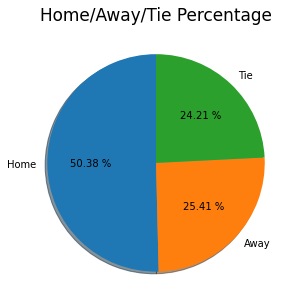

In [19]:
# Plot pie-chart!
home_count = result11['home/away'].value_counts()[0]
away_count = result11['home/away'].value_counts()[2]
tie_count = result11['home/away'].value_counts()[3]
labels2 = ['Home', 'Away', 'Tie']
plt.figure(figsize=(7,5))
plt.title('Home/Away/Tie Percentage', fontsize=17)
plt.pie([home_count, away_count, tie_count], labels=labels2, shadow=True, startangle=90, autopct='%.2f %%')
plt.show()

In [20]:
# Wow! It seems that the "home-effect" is much greater than we expected!

# 4. Is Chinese soccer becoming better or worse from 1980? How is the development of Chinese soccer team?
chn = result11.loc[(result11['home_team']=='China PR') | (result11['away_team']=='China PR')]
chn = chn.reset_index(drop=True)
chn.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,home/away
0,1980-03-16,Malaysia,China PR,3,1,Friendly,Kuala Lumpur,Malaysia,False,Malaysia,Home
1,1980-06-11,China PR,Japan,1,0,Guangzhou International Friendship Tournament,Guangzhou,China PR,False,China PR,Home
2,1980-06-13,China PR,Hong Kong,7,0,Guangzhou International Friendship Tournament,Guangzhou,China PR,False,China PR,Home
3,1980-09-18,North Korea,China PR,2,1,AFC Asian Cup,Kuwait City,Kuwait,True,North Korea,N/A
4,1980-09-20,China PR,Iran,2,2,AFC Asian Cup,Kuwait City,Kuwait,True,Tie,N/A


In [21]:
chn1 = chn.loc[(chn.date.str[:4].astype('int32')>=1980) & (chn.date.str[:4].astype('int32')<=1985)]
chn2 = chn.loc[(chn.date.str[:4].astype('int32')>=1986) & (chn.date.str[:4].astype('int32')<=1990)]
chn3 = chn.loc[(chn.date.str[:4].astype('int32')>=1991) & (chn.date.str[:4].astype('int32')<=1995)]
chn4 = chn.loc[(chn.date.str[:4].astype('int32')>=1996) & (chn.date.str[:4].astype('int32')<=2000)]
chn5 = chn.loc[(chn.date.str[:4].astype('int32')>=2001) & (chn.date.str[:4].astype('int32')<=2005)]
chn6 = chn.loc[(chn.date.str[:4].astype('int32')>=2006) & (chn.date.str[:4].astype('int32')<=2010)]
chn7 = chn.loc[(chn.date.str[:4].astype('int32')>=2011) & (chn.date.str[:4].astype('int32')<=2015)]
chn8 = chn.loc[(chn.date.str[:4].astype('int32')>=2016) & (chn.date.str[:4].astype('int32')<=2022)]
chn1 = chn1.reset_index(drop=True)
chn2 = chn2.reset_index(drop=True)
chn3 = chn3.reset_index(drop=True)
chn4 = chn4.reset_index(drop=True)
chn5 = chn5.reset_index(drop=True)
chn6 = chn6.reset_index(drop=True)
chn7 = chn7.reset_index(drop=True)
chn8 = chn8.reset_index(drop=True)

In [22]:
def winning_rate(df):
    tol = df.shape[0]
    win=0
    for i in range(0, tol):
        if (df['winner'][i]=='China PR'):
            win=win+1
    rate = round(win/tol, 3)
    return rate

chn_rate = np.array([], dtype='float64')
chn_rate = np.append(chn_rate, winning_rate(chn1))
chn_rate = np.append(chn_rate, winning_rate(chn2))
chn_rate = np.append(chn_rate, winning_rate(chn3))
chn_rate = np.append(chn_rate, winning_rate(chn4))
chn_rate = np.append(chn_rate, winning_rate(chn5))
chn_rate = np.append(chn_rate, winning_rate(chn6))
chn_rate = np.append(chn_rate, winning_rate(chn7))
chn_rate = np.append(chn_rate, winning_rate(chn8))
print(chn_rate)

[0.484 0.444 0.371 0.493 0.459 0.42  0.463 0.377]


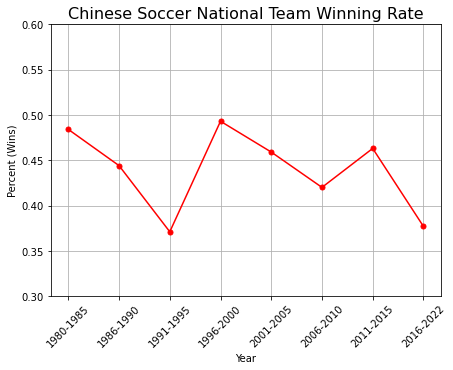

In [23]:
chn_labels = ['1980-1985', '1986-1990', '1991-1995', '1996-2000', '2001-2005', '2006-2010', '2011-2015', '2016-2022']
plt.figure(figsize=(7,5))
plt.title('Chinese Soccer National Team Winning Rate', fontsize=16)
plt.plot(chn_labels, chn_rate, 'r.-', markersize=10)
plt.ylim(0.3, 0.6)
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Percent (Wins)')
plt.grid(True)
plt.show()

In [94]:
# It's hard to tell whether Chinese national is becoming better or worse from 1980 till now. It was at its strongest during 1996 to 2000.

# 5. Which city in China is the most auspicious for Chinese National Team?
chn_home_win = chn.loc[(chn['country']=='China PR') & (chn['winner']=='China PR')]
chn_city1 = chn_home_win['city'].value_counts()
print(chn_city1[:3])

Guangzhou    24
Beijing      17
Shenyang      8
Name: city, dtype: int64


In [95]:
# Chinese National Team won 24 games in Guangzhou, 17 games in Beijing, and 8 games in Shenyang.
chn_home = chn.loc[chn['country']=='China PR']
chn_home = chn_home.reset_index(drop=True)
chn_city2 = chn_home.groupby(by=['city']).count()
chn_city2 = chn_city2.sort_values(by=['date'], ascending=False)
chn_city2.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,winner,home/away
city,,,,,,,,,,
Beijing,38,38,38,38,38,38,38,38,38,38
Guangzhou,32,32,32,32,32,32,32,32,32,32
Wuhan,12,12,12,12,12,12,12,12,12,12
Tianjin,11,11,11,11,11,11,11,11,11,11
Kunming,10,10,10,10,10,10,10,10,10,10


In [119]:
chn_city2['win'] = 0
chn_city2['rate'] = float(0)
length = chn_city2.shape[0]
for i in range(0, length):
    if (chn_city2.index.array[i] in chn_city1):
        chn_city2['win'][i] = chn_city1[chn_city2.index.array[i]]
        chn_city2['rate'][i] = chn_city2['win'][i]/chn_city2['date'][i]
    else:
        chn_city2['win'][i] = 0
        chn_city2['rate'][i] = 0
chn_city2 = chn_city2.loc[chn_city2['date']>=4]
chn_city2 = chn_city2.sort_values(by='rate', ascending=False)
chn_city2.head()

C:\Users\Lorry\AppData\Local\Temp/ipykernel_9924/1348724287.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chn_city2['win'][i] = chn_city1[chn_city2.index.array[i]]
C:\Users\Lorry\AppData\Local\Temp/ipykernel_9924/1348724287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chn_city2['rate'][i] = chn_city2['win'][i]/chn_city2['date'][i]
C:\Users\Lorry\AppData\Local\Temp/ipykernel_9924/1348724287.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,winner,home/away,win,rate
city,,,,,,,,,,,,
Chengdu,4,4,4,4,4,4,4,4,4,4,4,1.000000
Shenyang,10,10,10,10,10,10,10,10,10,10,8,0.800000
Guangzhou,32,32,32,32,32,32,32,32,32,32,24,0.750000
Kunming,10,10,10,10,10,10,10,10,10,10,7,0.700000
Tianjin,11,11,11,11,11,11,11,11,11,11,7,0.636364


In [125]:
# Considering only the cities that held 4 or more games, Chengdu is the most auspicious city for Chinese National Team. CHN won all 4 games 
# played in Chengdu.

# 6. Someone says that there are normally more goals in a game in the past than nowadays because of the intense defense in modern soccer.
# Is this true?
# We only need the data after 1960.
result12 = result1.loc[result1.date.str[:4].astype('int')>=1960]
result12 = result12.reset_index(drop=True)
result12.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1960-01-01,Morocco,Yugoslavia,0,5,Friendly,Casablanca,Morocco,False
1,1960-01-03,Tunisia,Yugoslavia,1,5,Friendly,Tunis,Tunisia,False
2,1960-01-06,Italy,Switzerland,3,0,International Cup,Naples,Italy,False
3,1960-01-08,Egypt,Yugoslavia,0,1,Friendly,Cairo,United Arab Republic,True
4,1960-01-27,Guinea-Bissau,Gambia,3,2,Friendly,Bissau,Guinea-Bissau,False


In [140]:
result_year = result12.groupby(by=result12.date.str[:4])
result_year_goal = result_year.apply(lambda x: round((x['home_score'] + x['away_score']).mean(), 3))
result_year_goal

date
1960    4.140
1961    3.466
1962    3.675
1963    3.791
1964    3.568
        ...  
2018    2.609
2019    2.873
2020    2.472
2021    2.738
2022    2.381
Length: 63, dtype: float64

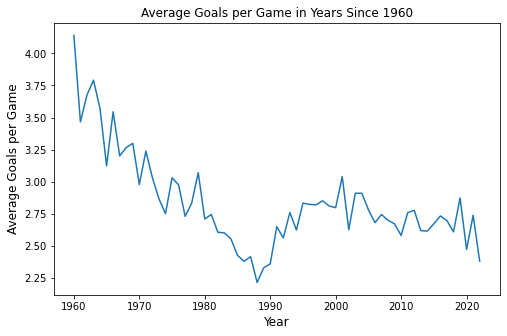

In [150]:
plt.figure(figsize=(8,5))
result_year_goal.plot()
plt.title('Average Goals per Game in Years Since 1960')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Average Goals per Game', fontsize=12)
plt.show()

In [ ]:
# Obviously, in average, there are fewer and fewer goals in a game since 1960. But we don't know what's going on around 1990...